# DBSCAN. Практическая работа

## Цель практической работы

Научиться строить модели кластеризации с помощью метода DBSCAN.

## Что входит в работу


- Загрузите данные и проведите разведочный анализ.
- Предположите оптимальное количество кластеров.
- Постройте модель кластеризации DBSCAN.
- Определите оптимальное количество и структуру кластеров.
- Интерпретируйте полученные результаты.

## Что оценивается 

1. Выполнены все задания.
2. Сделаны выводы по результатам разведочного анализа данных.
3. Объяснены выбранные гиперпараметры модели кластеризации.
4. Сделаны выводы о количестве и структуре кластеров.
5. Сделаны выводы по результатам кластеризации.

# Задача

Имеется некоторый набор данных `gt_2015.csv` о производительности и других параметрах ветряных электростанций:
* AT — температура окружающей среды.
* PT — давление окружающей среды.
* AH — влажность окружающей среды. 
* AFDP — перепад давления на воздушном фильтре. 
* GTEP — давление на выходе из газовой турбины. 
* TIT — температура на входе в турбину.
* TAT — температура на выходе из турбины. 
* TEY — давление нагнетания компрессора.
* CDP — энергоотдача турбины.
* CO — выбросы угарного газа. 
* NOX — выбросы оксидов азота.

Решите задачу кластеризации электростанций для дальнейшего совместного управления схожими электростанциями.

# Задание 1

Загрузите датасет и выполните разведочный анализ данных. Сделайте выводы о найденных закономерностях, особенностях и других свойствах данных, которые вы обнаружите.

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import numpy as np

In [6]:
df = pd.read_csv('gt_2015 (1).csv')
df

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,1.95320,1020.1,84.985,2.5304,20.116,1048.7,544.92,116.27,10.799,7.4491,113.250
1,1.21910,1020.1,87.523,2.3937,18.584,1045.5,548.50,109.18,10.347,6.4684,112.020
2,0.94915,1022.2,78.335,2.7789,22.264,1068.8,549.95,125.88,11.256,3.6335,88.147
3,1.00750,1021.7,76.942,2.8170,23.358,1075.2,549.63,132.21,11.702,3.1972,87.078
4,1.28580,1021.6,76.732,2.8377,23.483,1076.2,549.68,133.58,11.737,2.3833,82.515
...,...,...,...,...,...,...,...,...,...,...,...
7379,3.62680,1028.5,93.200,3.1661,19.087,1037.0,541.59,109.08,10.411,10.9930,89.172
7380,4.16740,1028.6,94.036,3.1923,19.016,1037.6,542.28,108.79,10.344,11.1440,88.849
7381,5.48200,1028.5,95.219,3.3128,18.857,1038.0,543.48,107.81,10.462,11.4140,96.147
7382,5.88370,1028.7,94.200,3.9831,23.563,1076.9,550.11,131.41,11.771,3.3134,64.738


In [7]:
df.describe()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
count,7384.000000,7384.00000,7384.000000,7384.000000,7384.000000,7384.000000,7384.000000,7384.000000,7384.000000,7384.000000,7384.000000
mean,17.225259,1014.50911,68.647464,3.598909,26.130149,1078.974689,546.642484,133.993380,12.097025,3.129986,59.890509
std,8.095783,6.89543,13.541116,0.610226,4.473737,19.762449,5.489066,16.179208,1.136601,2.234962,11.132464
min,-6.234800,989.40000,24.085000,2.368800,17.698000,1016.000000,516.040000,100.020000,9.870800,0.212800,25.905000
25%,11.073250,1009.67500,59.447250,3.117300,23.147000,1070.500000,544.747500,126.255000,11.465750,1.808175,52.399000
50%,17.456500,1014.00000,70.952000,3.538500,25.331000,1080.300000,549.720000,131.600000,11.933000,2.533400,56.838500
75%,23.684750,1018.30000,79.653750,4.194825,30.018250,1099.900000,550.030000,147.160000,13.148000,3.702550,65.093250
max,37.103000,1036.60000,96.666000,5.239500,40.716000,1100.400000,550.590000,179.500000,15.159000,41.097000,119.680000


In [8]:
# Удалим дубликаты
df = df.drop_duplicates()
df

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,1.95320,1020.1,84.985,2.5304,20.116,1048.7,544.92,116.27,10.799,7.4491,113.250
1,1.21910,1020.1,87.523,2.3937,18.584,1045.5,548.50,109.18,10.347,6.4684,112.020
2,0.94915,1022.2,78.335,2.7789,22.264,1068.8,549.95,125.88,11.256,3.6335,88.147
3,1.00750,1021.7,76.942,2.8170,23.358,1075.2,549.63,132.21,11.702,3.1972,87.078
4,1.28580,1021.6,76.732,2.8377,23.483,1076.2,549.68,133.58,11.737,2.3833,82.515
...,...,...,...,...,...,...,...,...,...,...,...
7379,3.62680,1028.5,93.200,3.1661,19.087,1037.0,541.59,109.08,10.411,10.9930,89.172
7380,4.16740,1028.6,94.036,3.1923,19.016,1037.6,542.28,108.79,10.344,11.1440,88.849
7381,5.48200,1028.5,95.219,3.3128,18.857,1038.0,543.48,107.81,10.462,11.4140,96.147
7382,5.88370,1028.7,94.200,3.9831,23.563,1076.9,550.11,131.41,11.771,3.3134,64.738


C:\Users\Msi-1\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


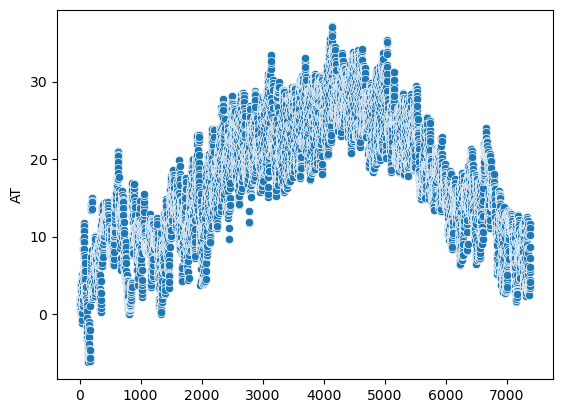

C:\Users\Msi-1\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


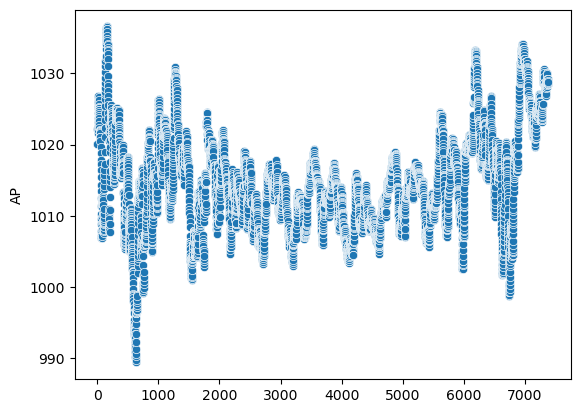

C:\Users\Msi-1\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


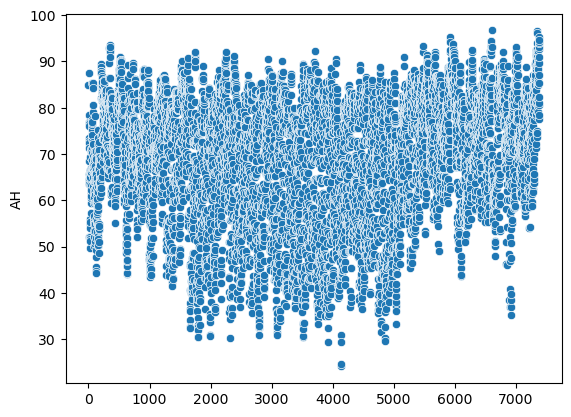

C:\Users\Msi-1\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


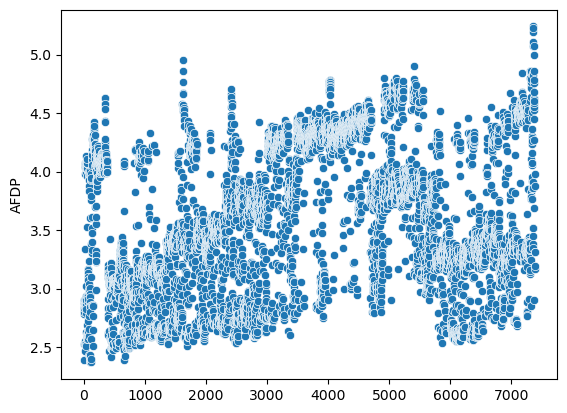

C:\Users\Msi-1\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


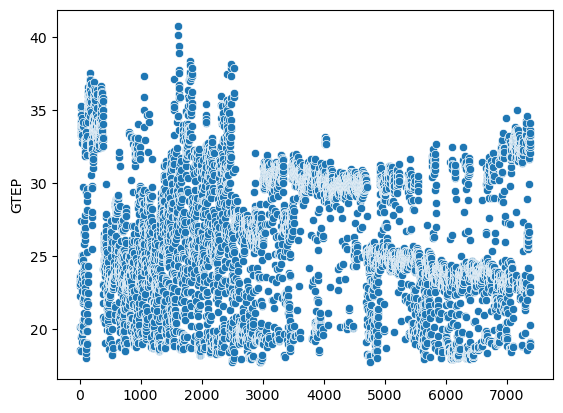

C:\Users\Msi-1\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


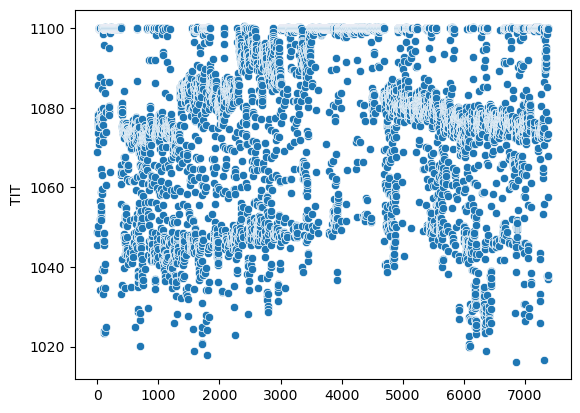

C:\Users\Msi-1\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


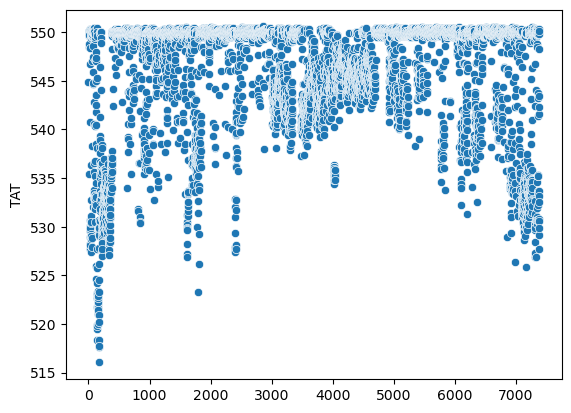

C:\Users\Msi-1\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


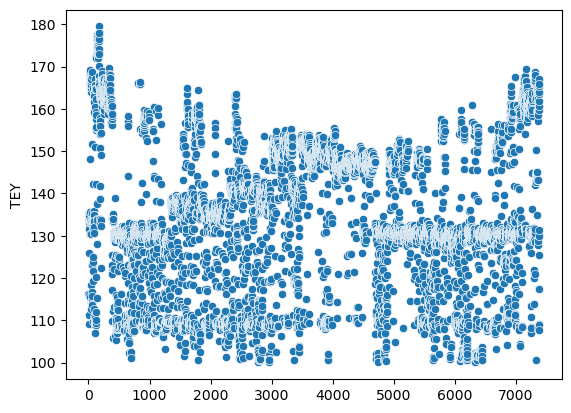

C:\Users\Msi-1\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


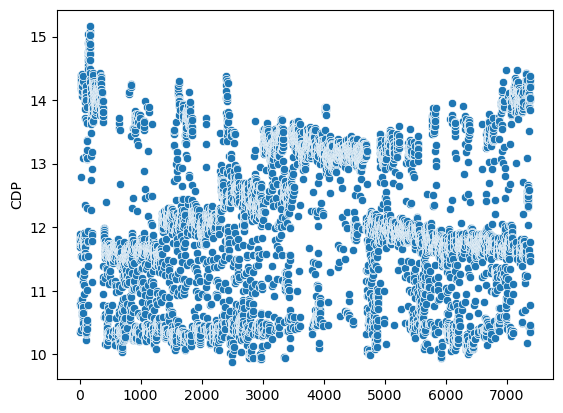

C:\Users\Msi-1\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


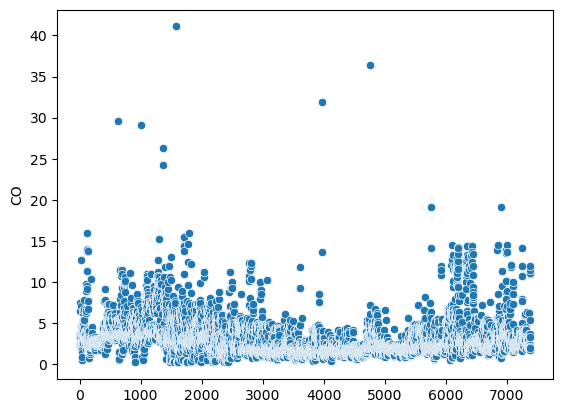

C:\Users\Msi-1\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


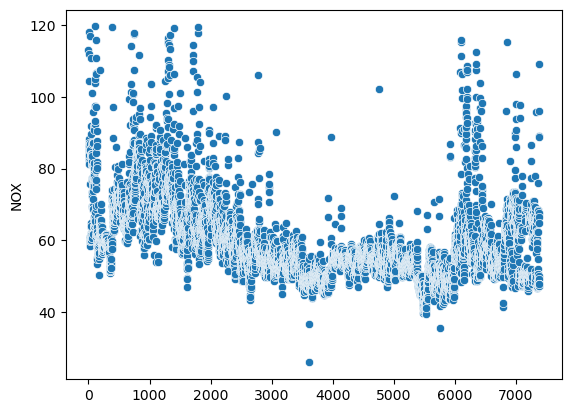

In [9]:
for i in df.columns:
    sns.scatterplot(df.index, df[i]);
    plt.show()

Пропусков данных в датасете нет, выбросы присутствуют в колонках CO и NOX, но не будем их удалять.

# Задание 2

Предположите по результатам разведочного анализа данных, какие группы электростанций существуют, чем они отличаются, каково их количество.

Предположить какие группы достаточно сложно, скорее всего их будет 10 или больше, основные отличия скорее всего будут по колонкам CDP, TEY, TIT, GTEP, AFDP. Различия по энергоотдаче(CDP) возможно самые важные. А турбины можно разделить турбины с высокой, средней и низкой энергоотдачей.

# Задание 3

Постройте модель кластеризации DBSCAN. Подберите оптимальные гиперпараметры, руководствуясь как результатами сеточного поиска, так и результатами анализа данных в предыдущих заданиях.

График при eps = 1.0


C:\Users\Msi-1\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


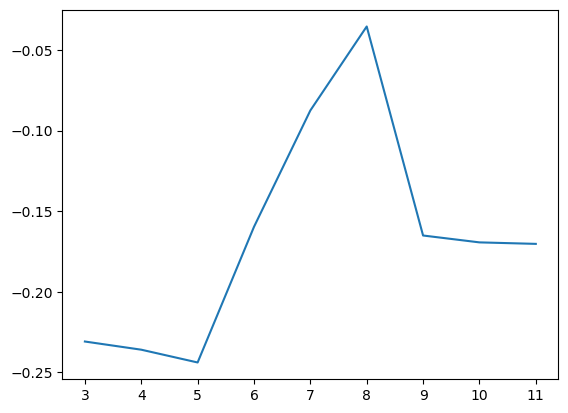

C:\Users\Msi-1\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


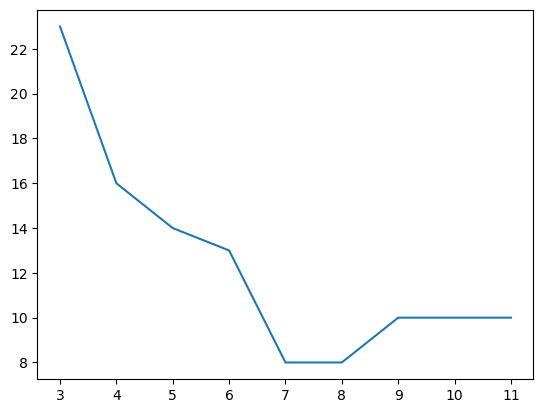

График при eps = 1.2


C:\Users\Msi-1\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


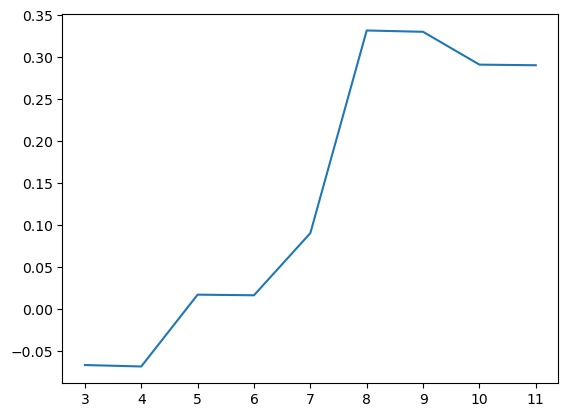

C:\Users\Msi-1\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


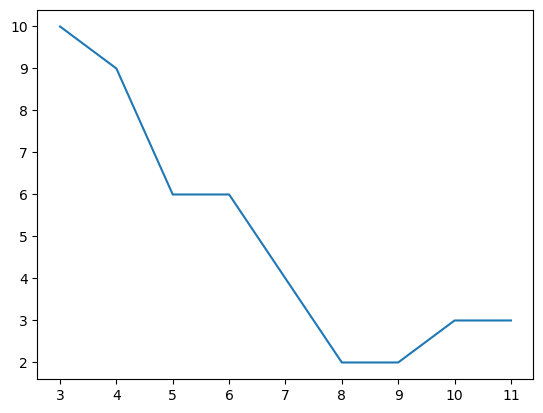

График при eps = 1.4


C:\Users\Msi-1\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


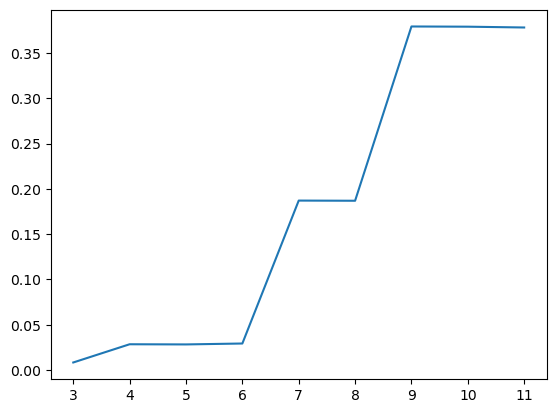

C:\Users\Msi-1\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


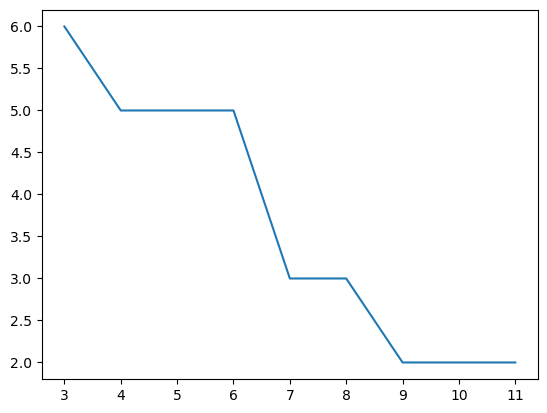

График при eps = 1.5999999999999999


C:\Users\Msi-1\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


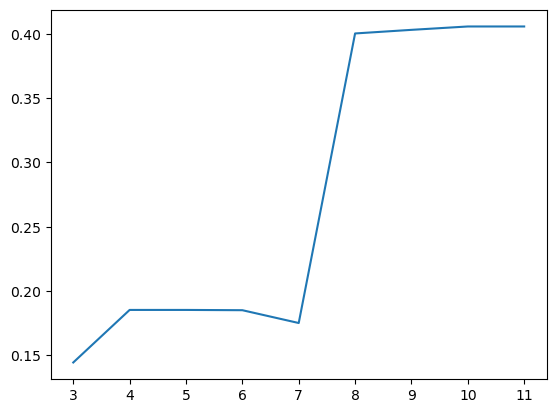

C:\Users\Msi-1\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


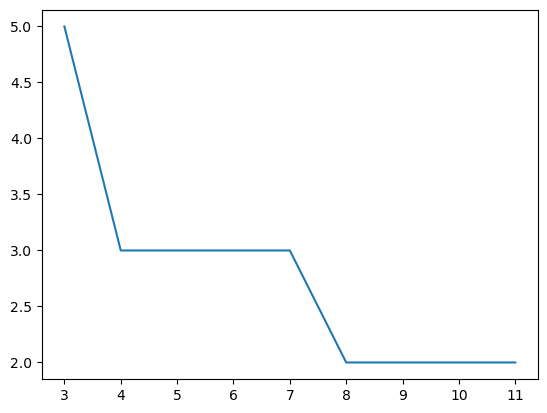

График при eps = 1.7999999999999998


C:\Users\Msi-1\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


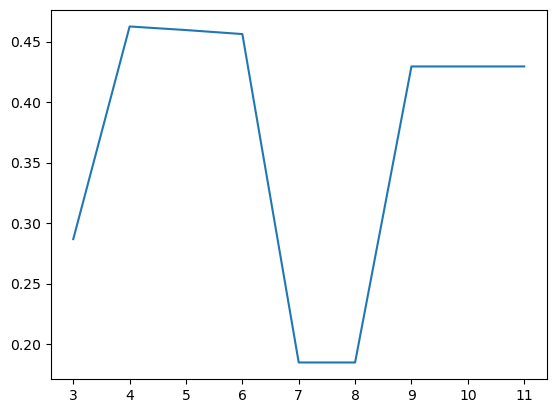

C:\Users\Msi-1\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


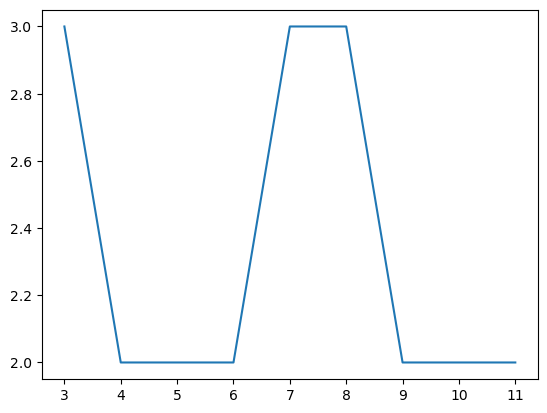

In [29]:
scaler = StandardScaler()

df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

eps_ = np.arange(1,2,0.2)
min_samples_ = np.arange(3,12,1)

for i in eps_:
    metrics = []
    labels = []
    for k in min_samples_:
        model = DBSCAN(eps=i, min_samples=k).fit(df_scaled)
        score = silhouette_score(df_scaled, model.labels_)
        metrics.append(score)
        labels.append(len(np.unique(model.labels_))) 
    print(f'График при eps = {i}')
    
    sns.lineplot(min_samples_, metrics);
    plt.show()
    sns.lineplot(min_samples_, labels);
   
    plt.show()



In [33]:
# По результатам оптимизации я выбираю eps = 1, min_samples = 8, при этом получим 8 кластеров
model = DBSCAN(eps=1, min_samples=8)
model.fit(df_scaled)

DBSCAN(eps=1, min_samples=8)

In [34]:
df['labels'] = model.labels_
df

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX,labels
0,1.95320,1020.1,84.985,2.5304,20.116,1048.7,544.92,116.27,10.799,7.4491,113.250,-1
1,1.21910,1020.1,87.523,2.3937,18.584,1045.5,548.50,109.18,10.347,6.4684,112.020,-1
2,0.94915,1022.2,78.335,2.7789,22.264,1068.8,549.95,125.88,11.256,3.6335,88.147,0
3,1.00750,1021.7,76.942,2.8170,23.358,1075.2,549.63,132.21,11.702,3.1972,87.078,0
4,1.28580,1021.6,76.732,2.8377,23.483,1076.2,549.68,133.58,11.737,2.3833,82.515,0
...,...,...,...,...,...,...,...,...,...,...,...,...
7379,3.62680,1028.5,93.200,3.1661,19.087,1037.0,541.59,109.08,10.411,10.9930,89.172,-1
7380,4.16740,1028.6,94.036,3.1923,19.016,1037.6,542.28,108.79,10.344,11.1440,88.849,-1
7381,5.48200,1028.5,95.219,3.3128,18.857,1038.0,543.48,107.81,10.462,11.4140,96.147,-1
7382,5.88370,1028.7,94.200,3.9831,23.563,1076.9,550.11,131.41,11.771,3.3134,64.738,0


# Задание 4

Интерпретируйте результаты кластеризации: объясните, чем схожи электростанции в каждом кластере и чем аномальные электростанции отличаются от остальных. 

In [38]:
features = df.drop(columns=['labels']).columns

df_g = df.groupby('labels').agg({x: ['mean', 'std'] for x in features}).T
df_g

labels              -1            0            1            2            3  \
AT   mean    10.823830    17.770314    -4.255458     0.988999    14.353074   
     std      7.445570     7.848198     1.524334     1.351277     2.480714   
AP   mean  1016.187257  1014.144724  1034.494737  1022.153333  1019.161765   
     std     10.420902     6.406251     1.917902     2.892568     4.689780   
AH   mean    68.394147    68.566721    61.792026    75.892467    75.661544   
     std     14.829924    13.514266     8.089736     2.544851     7.848100   
AFDP mean     3.299217     3.624197     4.229982     2.653620     2.609524   
     std      0.709049     0.593143     0.087872     0.080619     0.043042   
GTEP mean    25.368581    26.239370    35.652526    18.878333    18.248132   
     std      6.079034     4.262065     0.670500     0.386098     0.593977   
TIT  mean  1063.380826  1080.314913  1099.968421  1044.993333  1029.942647   
     std     28.282543    18.142571     0.087318     3.157636     3.520147   
TAT  mean   541.816460   547.064027   521.773684   547.463333   541.989706   
     std      6.432901     5.012508     2.325574     1.975173     2.997909   
TEY  mean   127.573274   134.537816   174.829737   110.490667   101.780441   
     std     20.811769    15.255317     1.944245     1.666320     1.287032   
CDP  mean    11.687416    12.131269    14.794079    10.479400    10.108821   
     std      1.411456     1.086781     0.151599     0.119842     0.108071   
CO   mean     6.775858     2.833608     2.072501     9.356460    11.448276   
     std      5.446786     1.461598     0.691464     0.762710     1.537875   
NOX  mean    77.322903    58.531687    58.886184   110.349333    88.756368   
     std     19.337569     8.946573     3.727093     4.386721    10.046075   

labels               4            5            6  
AT   mean    13.938000    18.095000     6.475440  
     std      0.641001     1.045910     3.358884  
AP   mean  1032.144444  1025.987500  1027.940000  
     std      0.813288     0.360307     0.705927  
AH   mean    58.121333    76.311750    86.401680  
     std      2.313517     4.135877     6.998239  
AFDP mean     2.610300     2.630762     4.031148  
     std      0.012515     0.028703     0.242086  
GTEP mean    18.183111    18.051000    26.053360  
     std      0.083497     0.066661     0.432910  
TIT  mean  1031.800000  1037.362500  1091.100000  
     std      2.918904     1.527778     2.139509  
TAT  mean   541.337778   547.245000   549.782800  
     std      1.947241     1.247134     0.716226  
TEY  mean   102.852222   101.401250   143.874400  
     std      0.873415     0.607158     0.805394  
CDP  mean    10.243167    10.129750    12.480160  
     std      0.051937     0.034985     0.088432  
CO   mean    11.543444     8.484825     2.646668  
     std      1.374110     0.695973     0.305218  
NOX  mean    91.638444    71.830375    63.131600  
     std      6.137984     2.247394     2.796449

In [40]:
functions = ['mean', 'std']
stat = np.array([[df[feature].apply(f) for f in functions] for feature in features]).flatten()
df_g_rel = df_g.copy()
df_g_rel['Global'] = stat
cluster_labels = np.arange(-1,7)

for i in cluster_labels:
    df_g_rel[i] = 100 * df_g_rel[i] / df_g_rel['Global'] - 100
df_g_rel

labels             -1          0           1           2           3  \
AT   mean  -37.163038   3.164277 -124.704754  -94.258440  -16.674267   
     std    -8.031505  -3.058206  -81.171260  -83.308877  -69.357951   
AP   mean    0.165415  -0.035917    1.969980    0.753490    0.458611   
     std    51.127655  -7.094245  -72.185891  -58.050935  -31.987126   
AH   mean   -0.369011  -0.117621   -9.986440   10.553926   10.217537   
     std     9.517733  -0.198285  -40.257982  -81.206492  -42.042444   
AFDP mean   -8.327308   0.702666   17.535106  -26.265989  -27.491262   
     std    16.194568  -2.799424  -85.600112  -86.788595  -92.946611   
GTEP mean   -2.914517   0.417988   36.442110  -27.752675  -30.164453   
     std    35.882699  -4.731436  -85.012527  -91.369679  -86.723015   
TIT  mean   -1.445248   0.124213    1.945711   -3.149412   -4.544318   
     std    43.112544  -8.196747  -99.558161  -84.022040  -82.187696   
TAT  mean   -0.882848   0.077115   -4.549372    0.150162   -0.851156   
     std    17.194806  -8.681960  -57.632613  -64.016224  -45.383986   
TEY  mean   -4.791361   0.406315   30.476399  -17.540205  -24.040694   
     std    28.632799  -5.710361  -87.983064  -89.700858  -92.045147   
CDP  mean   -3.386027   0.283080   22.295186  -13.372088  -16.435481   
     std    24.182268  -4.383223  -86.662106  -89.456099  -90.491776   
CO   mean  116.482096  -9.468987  -33.785603  198.929816  265.761322   
     std   143.708186 -34.603039  -69.061481  -65.873715  -31.190099   
NOX  mean   29.107104  -2.268844   -1.676936   84.251786   48.197717   
     std    73.704307 -19.635285  -66.520498  -60.595236   -9.758745   

labels              4           5          6       Global  
AT   mean  -19.083947    5.049217 -62.407300    17.225259  
     std   -92.082280  -87.080809 -58.510694     8.095783  
AP   mean    1.738312    1.131423   1.323881  1014.509110  
     std   -88.205401  -94.774693 -89.762389     6.895430  
AH   mean  -15.333605   11.164704  25.862887    68.647464  
     std   -82.914872  -69.456899 -48.318598    13.541116  
AFDP mean  -27.469687  -26.901112  12.010277     3.598909  
     std   -97.949085  -95.296289 -60.328484     0.610226  
GTEP mean  -30.413289  -30.918878  -0.293870    26.130149  
     std   -98.133618  -98.509944 -90.323299     4.473737  
TIT  mean   -4.372177   -3.856642   1.123781  1078.974689  
     std   -85.230050  -92.269286 -89.173866    19.762449  
TAT  mean   -0.970416    0.110221   0.574474   546.642484  
     std   -64.525095  -77.279672 -86.951774     5.489066  
TEY  mean  -23.240818  -24.323687   7.374260   133.993380  
     std   -94.601622  -96.247294 -95.022045    16.179208  
CDP  mean  -15.324909  -16.262468   3.167186    12.097025  
     std   -95.430506  -96.921989 -92.219562     1.136601  
CO   mean  268.801846  171.081923 -15.441526     3.129986  
     std   -38.517518  -68.859754 -86.343479     2.234962  
NOX  mean   53.009960   19.936156   5.411693    59.890509  
     std   -44.864099  -79.812246 -74.880232    11.132464

<AxesSubplot:xlabel='labels', ylabel='None-None'>

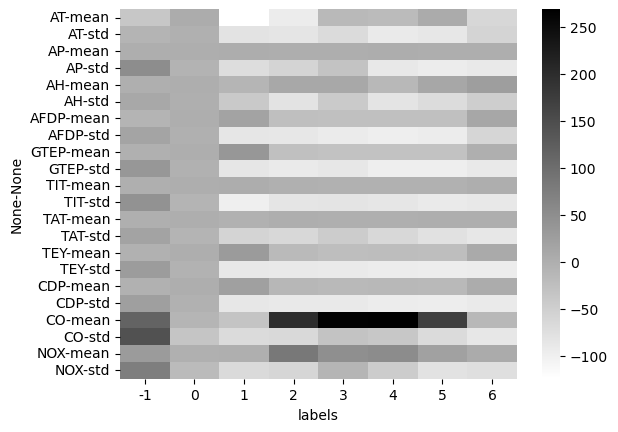

In [41]:
sns.heatmap(df_g_rel[cluster_labels], cmap='binary')

Выбросы отличаются большим среднеквадратичным отклонением по всем параметрам, что логично, и повышенными показателями по CO, т.е. по выбрасам угарного газа. Группу 0 я бы назвал средней, группа со средними параметрами. Группа 1 отличается повышенной энергоотдачей(CDP), TEY, GTEP, AFDP - это видимо высокопроизводительные подстанции, работающие при низких температурах(AT). Группа 2 отличается повышенным CO и NOX. В целом группы 2-5 наиболее грязные подстанции. Группа 5 работает в наиболее тяжелых условиях из групп 2-5. Группы 3 и 4 отличается особенно большими выбрасами, при этом группа 3 работает в более худших условиях. Группа 6 отличается от основной группы 0, что работает при более низких показателях AT, AP, AH.

**Как отправить работу на проверку**

Скачайте файл с работой в материалах, откройте его через Jupyter Notebook и выполните задания. Сохраните изменения при помощи опции Save and Checkpoint на вкладке меню File или кнопки Save and Checkpoint на панели инструментов. Отправьте через форму ниже итоговый файл Jupyter Notebook (в формате .ipynb) или ссылку на него.
